In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPF", "Age", "Outcome"]
data = pd.read_csv(url, names=names)
data.shape

(768, 9)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
for i in data.columns:
    med = data[i].median()
    print("The median of "+i+" is: ",med)

The median of Pregnancies is:  3.0
The median of Glucose is:  117.0
The median of BloodPressure is:  72.0
The median of SkinThickness is:  23.0
The median of Insulin is:  30.5
The median of BMI is:  32.0
The median of DiabetesPF is:  0.3725
The median of Age is:  29.0
The median of Outcome is:  0.0


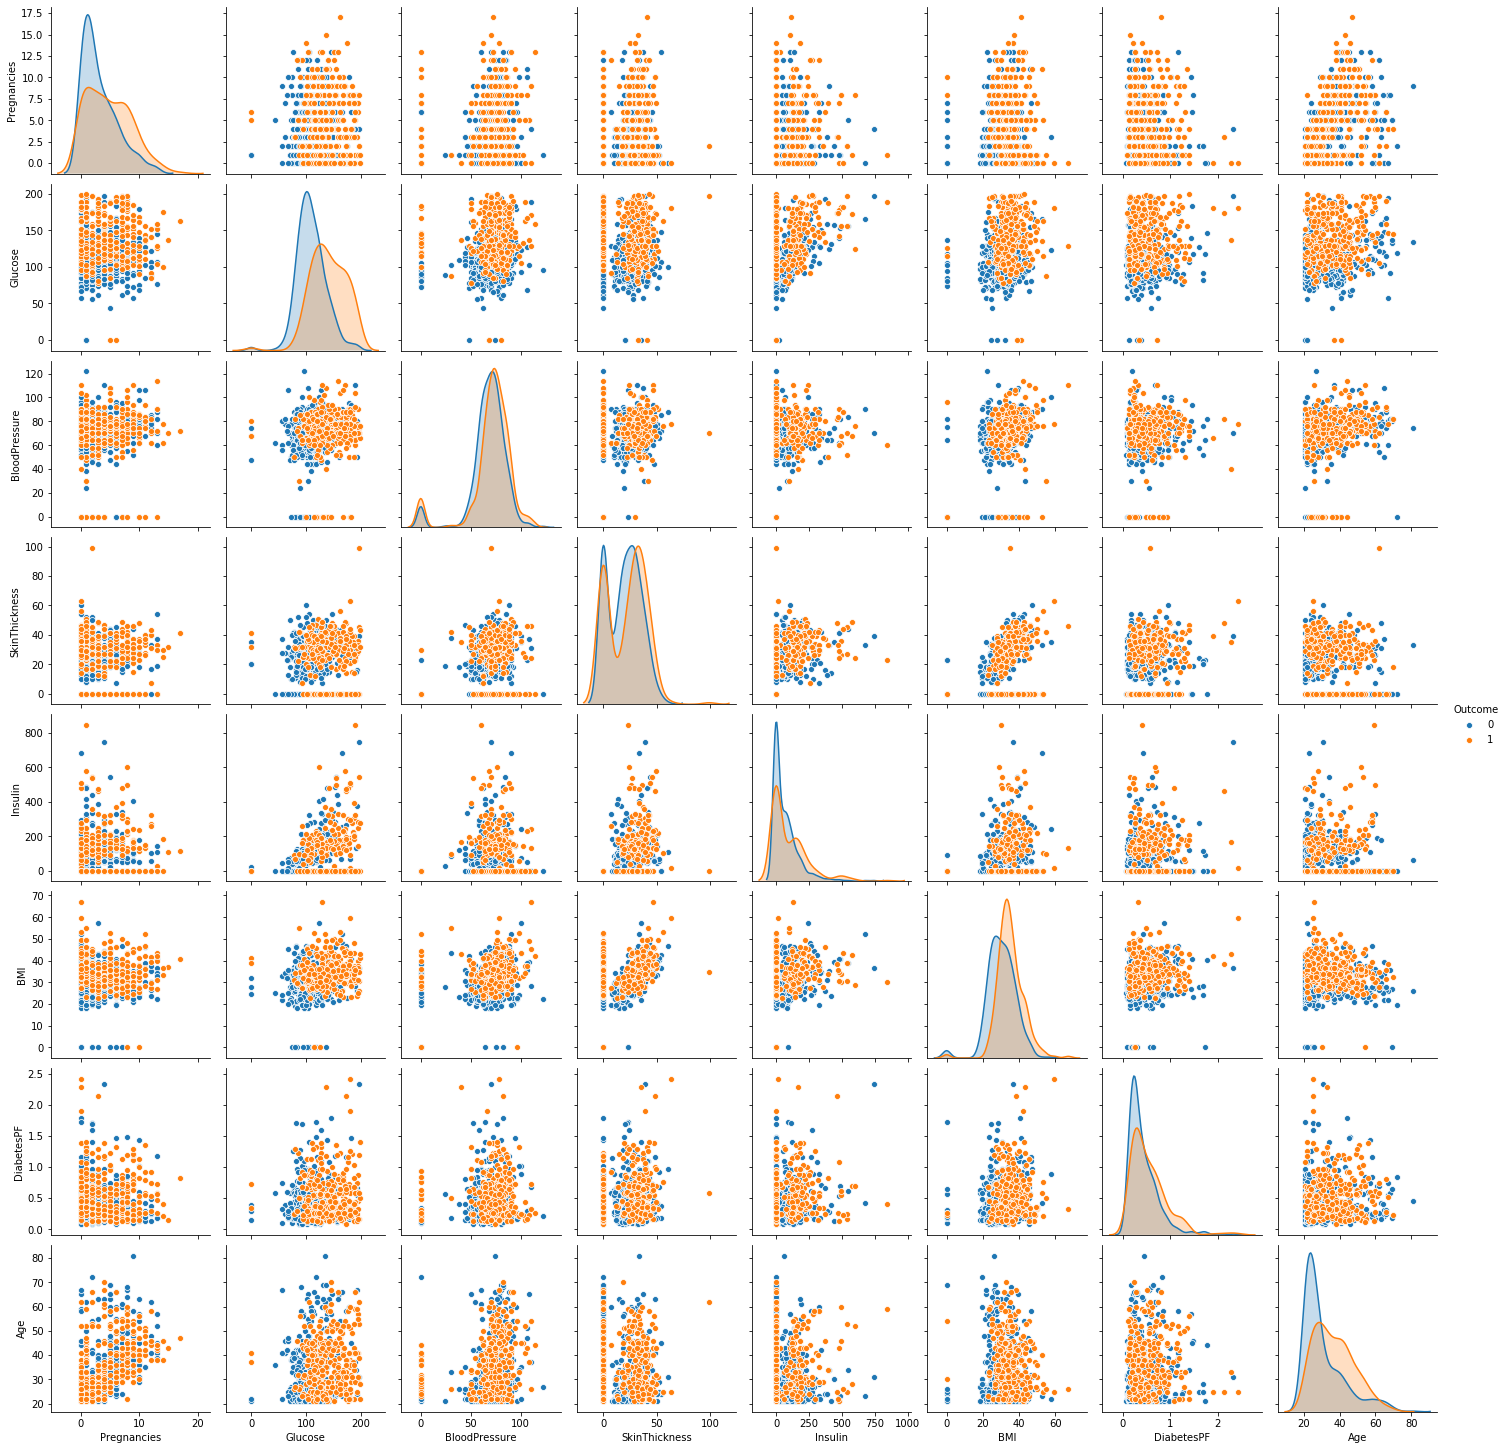

In [6]:
sns.pairplot(data, hue = 'Outcome')

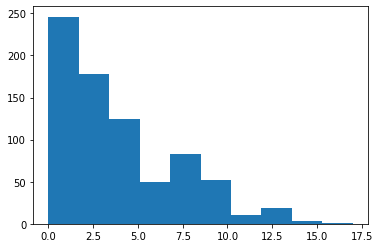

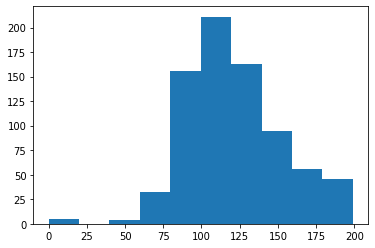

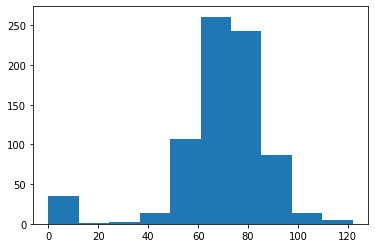

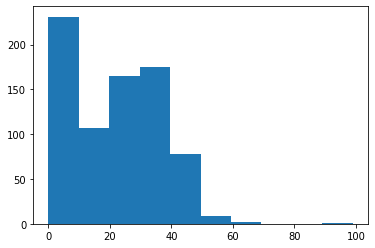

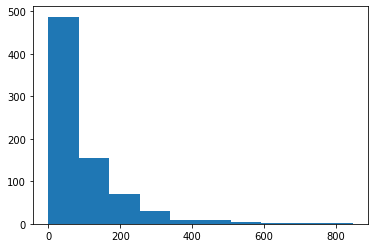

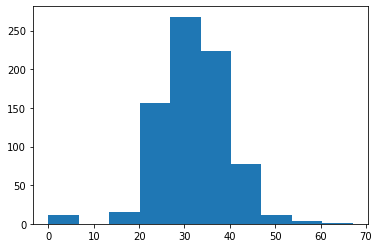

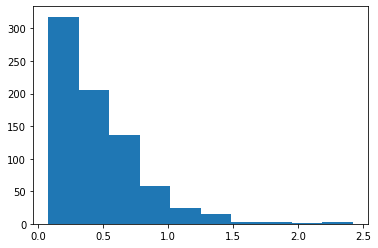

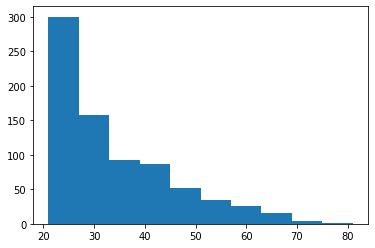

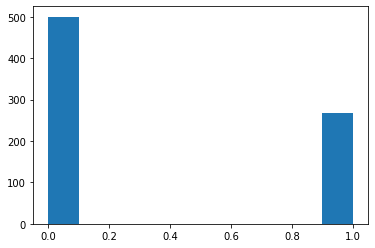

In [7]:
for i in data.columns:
    plt.hist(data[i])
    plt.show()

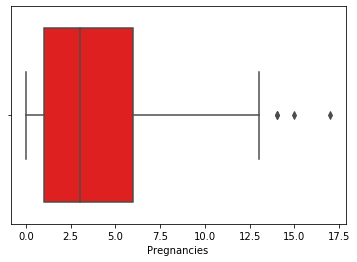

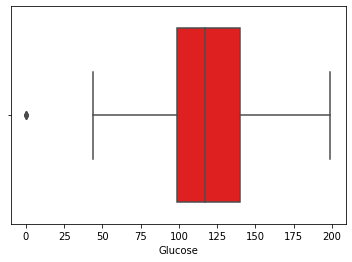

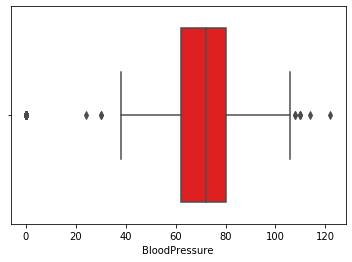

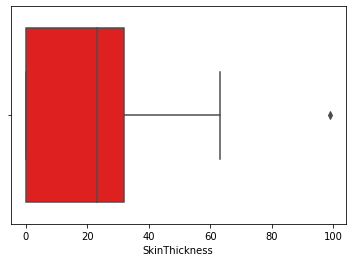

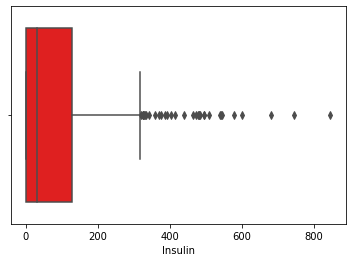

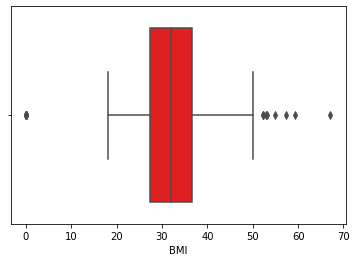

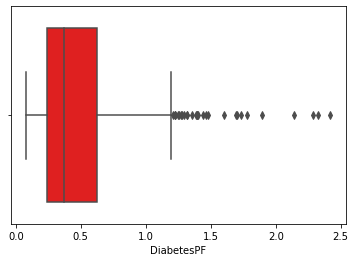

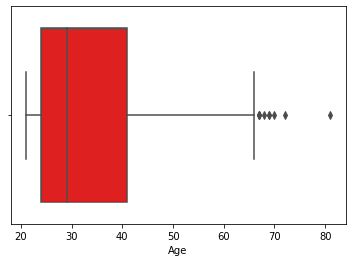

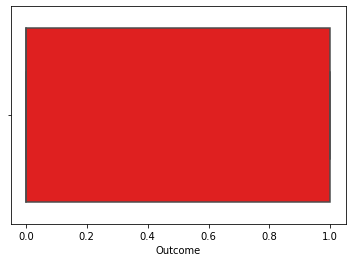

In [8]:
for i in data.columns:
    sns.boxplot(data[i], color="red")
    plt.show()

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


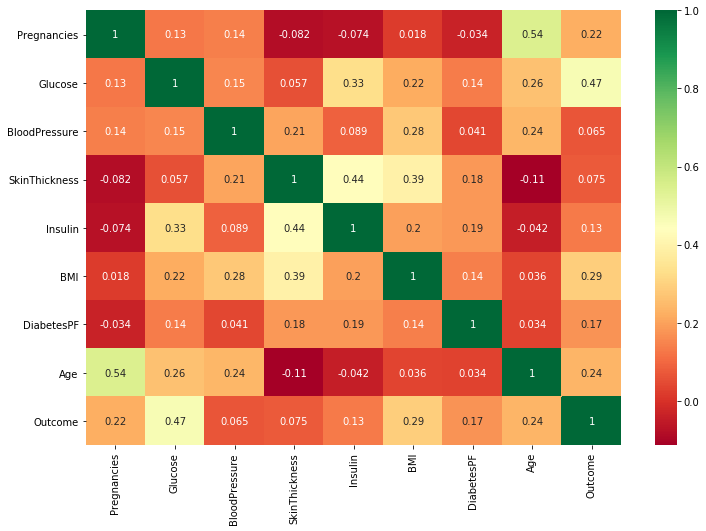

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')
plt.show()

In [11]:
data[['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)

In [12]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [13]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [14]:
for feature in data.select_dtypes(include=['float',"int"]):
    
    Q1 = data[feature].quantile(0.05)
    Q3 = data[feature].quantile(0.95)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Glucose no
BloodPressure no
SkinThickness yes
Insulin yes
BMI no
DiabetesPF no


In [15]:
x = detect_outliers(data["Insulin"])
min(x)

402.0

In [16]:
for i in range(768):
    if data["Insulin"][i] > 400:
        data["Insulin"][i] = 80

In [17]:
data.drop(columns=['BloodPressure','SkinThickness'], axis=1, inplace=True)

In [18]:
data.shape

(768, 7)

In [19]:
x = data.iloc[:,0:6]
y = data.iloc[:,6]
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [20]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [23]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(x_train, y_train)
pred1 = clf.predict(x_test)
print(accuracy_score(y_test, pred1)*100)

83.11688311688312


In [25]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       107
           1       0.71      0.77      0.73        47

    accuracy                           0.83       154
   macro avg       0.80      0.81      0.81       154
weighted avg       0.84      0.83      0.83       154



In [26]:
print(confusion_matrix(y_test, pred1))

[[92 15]
 [11 36]]


In [28]:
import pickle
pickle_out = open("classifier_heart.pkl","wb")
pickle.dump(clf, pickle_out)
pickle_out.close()